# Lab | Customer Analysis Round 2

For this lab, we still keep using the `marketing_customer_analysis.csv` file. You can find the file in the `Data` folder.

### Get the data

- Use the same jupyter file from the last lab, `Customer Analysis Round`

### Complete the following tasks:

- Show DataFrame info.
- Describe DataFrame.
- Show a plot of the total number of responses.
- Show a plot of the response rate by the sales channel.
- Show a plot of the response rate by the total claim amount.
- Show a plot of the response rate by income.

- Check the data types of the columns. Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
(You can use np.number and np.object to select the numerical data types and categorical data types respectively)
- Now we will try to check the distributions of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms
- For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable. 
- Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features.

### Vamos a importar librerias que posiblemente tengamos que usar.

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

In [3]:
import numpy as np
import pandas as pd
import random

In [4]:
#Para obtener medidas estadísitcas
from scipy.stats import trim_mean, mode, skew, gaussian_kde, pearsonr, spearmanr

### My code

In [5]:
#importamos el csv
data = pd.read_csv("Data/marketing_customer_analysis.csv")

### Tasks

- Show DataFrame info.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10910 non-null  int64  
 1   Customer                       10910 non-null  object 
 2   State                          10279 non-null  object 
 3   Customer Lifetime Value        10910 non-null  float64
 4   Response                       10279 non-null  object 
 5   Coverage                       10910 non-null  object 
 6   Education                      10910 non-null  object 
 7   Effective To Date              10910 non-null  object 
 8   EmploymentStatus               10910 non-null  object 
 9   Gender                         10910 non-null  object 
 10  Income                         10910 non-null  int64  
 11  Location Code                  10910 non-null  object 
 12  Marital Status                 10910 non-null 

In [7]:
data.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [8]:
data.tail()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A
10909,10909,IV32877,NaN,6857.519928,NaN,Basic,Bachelor,1/8/11,Unemployed,M,...,0.0,3,Personal Auto,Personal L1,Offer4,Web,1021.719397,SUV,Medsize,NaN


- Describe DataFrame.

In [9]:
data.describe()

,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,10910.000000,10910.000000,10910.000000,10910.000000,10277.000000,10910.000000,10277.000000,10910.000000,10910.000000
mean,5454.500000,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330
std,3149.590053,6885.081434,30359.195670,34.442532,10.080349,27.940675,0.912457,2.399359,292.180556
min,0.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,2727.250000,4014.453113,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,271.082527
50%,5454.500000,5771.147235,33813.500000,83.000000,14.000000,48.000000,0.000000,2.000000,382.564630
75%,8181.750000,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000
max,10909.000000,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


#### Que significa cada columna:
- unnamed: es una columna que tiene el mismo registro que el índice
- customer, es el id de cada registro
- state, estado o región donde vive el cliente
- customer lifetime value, el valor de vida del cliente, mide el beneficio neto de cada cliente, ganancias que puede generar un cliente.
- response, respuesta ante una campaña de marketing.
- coverage, tipo de cobertura que ha escogido el cliente
- education, nivel de educación que tiene el cliente
- effective to date, fecha efectiva de la poliza
- employment status, si tiene empleo o no, su situación laboral
- gender, genero de la persona
- income, ingreso del cliente
- income, el ingreso anual del cliente
- location code, indica la ubicación geográfica del cliente, posiblemente mediante un sistema codificado
- marital status,el estado civil del cliente (soltero, casado, etc.)
- monthly premium auto, prima mensual del seguro
- months since last claim - Meses Desde la Última Reclamación: cuántos meses han pasado desde que el cliente realizó su última reclamación de seguro
- months aince policy inception - Meses Desde la Incepción de la Póliza: el número de meses desde que la póliza de seguro comenzó.
- number of open complaints, número de quejas abiertas o en proceso
- number of policies - Número de Pólizas: la cantidad de pólizas de seguro que tiene el cliente
- policy type, el tipo de póliza de seguro que el cliente ha adquirido
- policy, los detalles de la póliza de seguro del cliente
- renew offer type, el tipo de oferta presentada al cliente para la renovación de su póliza
- sales channel, el canal a través del cual se vendió la póliza de seguro al cliente (por ejemplo, en línea, a través de un agente, etc.)
- total claim amount, la cantidad total en dinero reclamada por el cliente
- vehicle class, la categoría o tipo de vehículo asegurado
- vehicle size, el tamaño del vehículo asegurado
- vehicle type, se refiere al tipo específico de vehículo o si es comercial, personal, etc

In [10]:
data.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [11]:
#Voy a realizar las buenas practicas y poner las columnas en minúscula y substituir los espacios por "_".
stand_col = []
for i in range(len(data.columns)):
    stand_col.append(data.columns[i].lower().replace(' ','_'))
data.columns = stand_col

In [12]:
data

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


- Show a plot of the total number of responses.

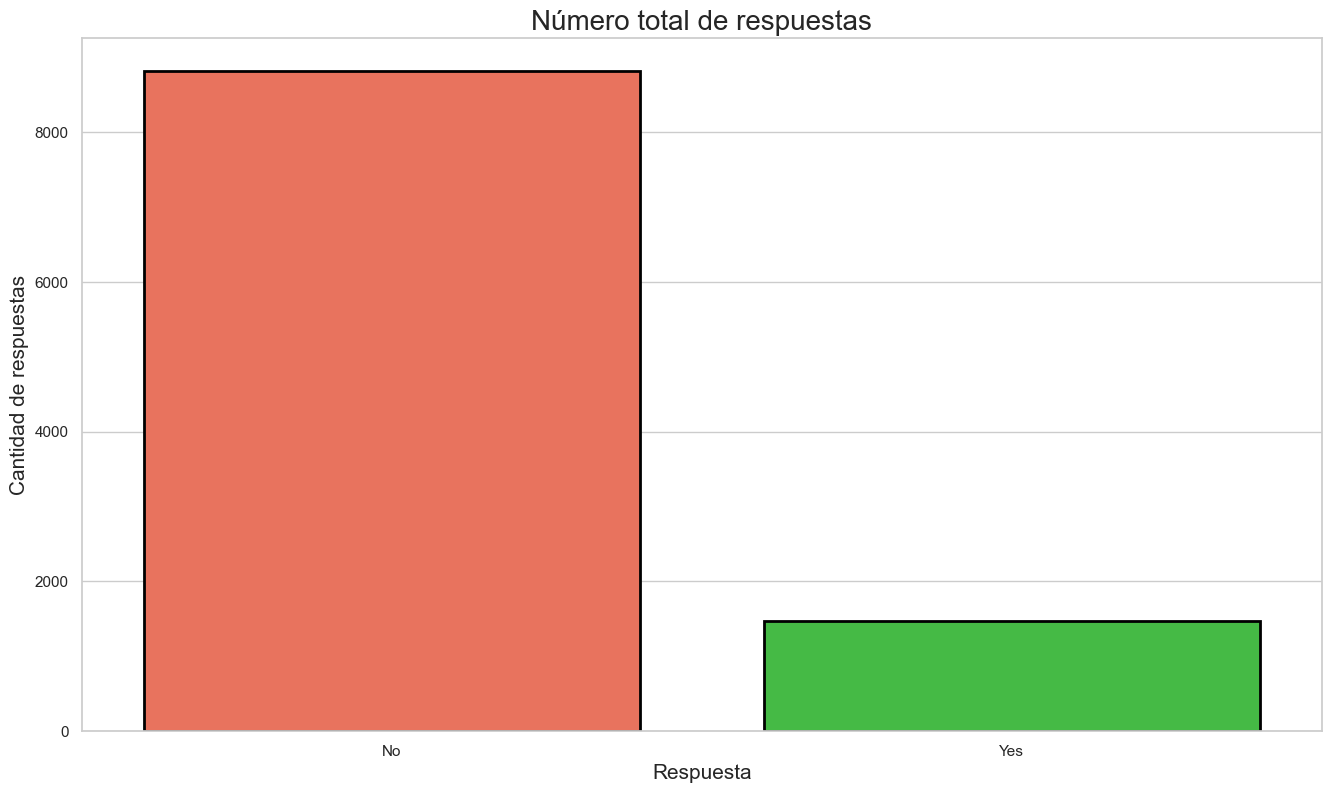

In [13]:
paleta_colores = {"Yes":"limegreen", "No":"tomato"}
sns.countplot(x='response', data=data, palette=paleta_colores, linewidth=2, edgecolor="black")
plt.title('Número total de respuestas',size=20)
plt.xlabel('Respuesta', size=15)
plt.ylabel('Cantidad de respuestas', size=15)
plt.show()

- Show a plot of the response rate by the sales channel.

In [14]:
#Vamos a ver que tipos de canales tenemos.
data['sales_channel'].unique()
print("tipos de canales:", data['sales_channel'].unique())

tipos de canales: ['Agent' 'Call Center' 'Branch' 'Web']


In [15]:
#Vamos a ver si tenemos nulos en la columna response
data['response'].isnull().sum()
print("El número de nulos es:", data['response'].isnull().sum())

El número de nulos es: 631


In [16]:
#En lugar de tratar eliminar los nulos los voy a tratar como una nueva categoria que la voy a llamar 'no response'
data['response'].fillna(value='no response', inplace=True)

In [17]:
data['response'].unique()

array(['No', 'Yes', 'no response'], dtype=object)

In [18]:
# Vamos a calcular el porcentage de cada respuesta según el canal
response_rate = data.groupby('sales_channel')['response'].value_counts(normalize=True).unstack() * 100
response_rate_long = response_rate.reset_index().melt(id_vars='sales_channel', value_name='rate', var_name='response')

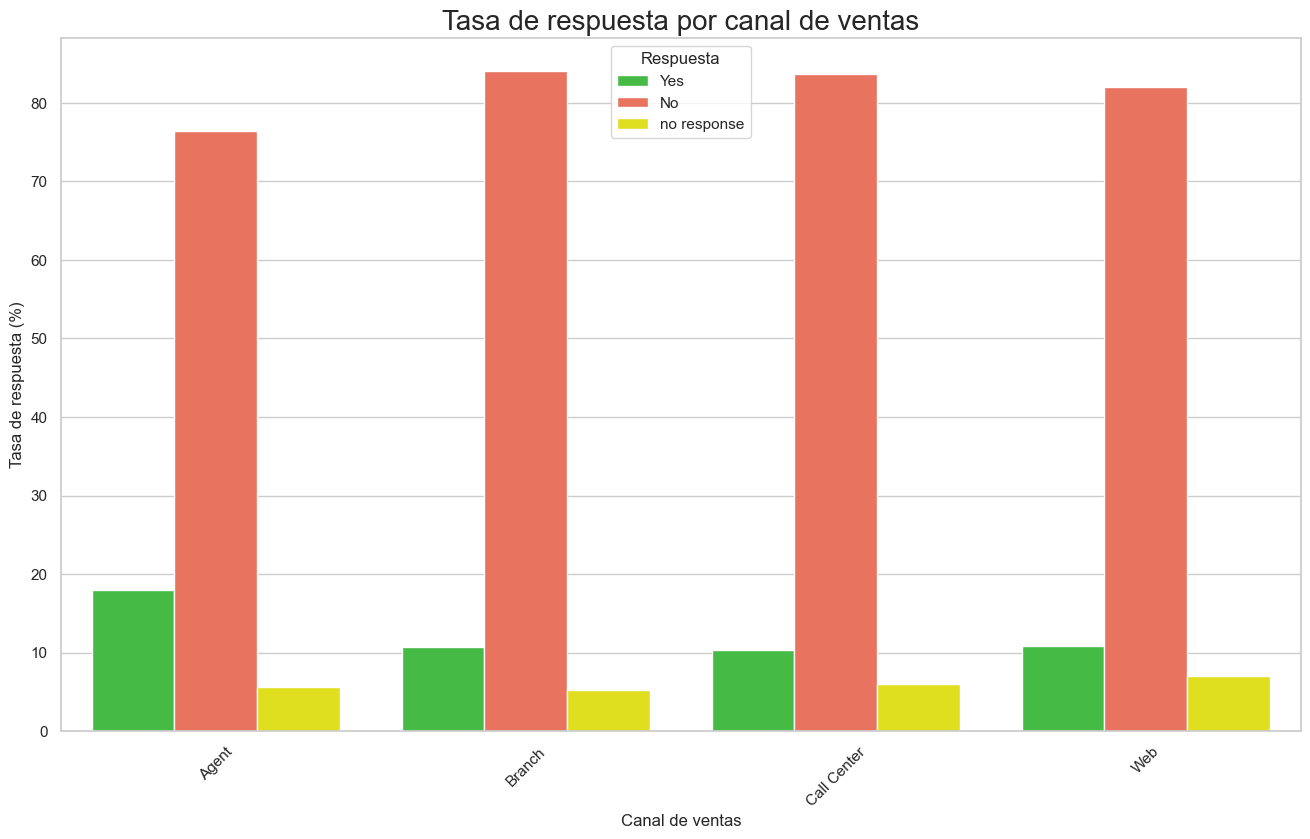

In [19]:
response_order = ["Yes", "No", "no response"]
paleta_colores = {"Yes":"limegreen", "No":"tomato", "no response":"yellow"}
sns.barplot(x='sales_channel', y='rate', hue='response', data=response_rate_long, hue_order=response_order, palette=paleta_colores)
plt.title('Tasa de respuesta por canal de ventas', size=20)
plt.xlabel('Canal de ventas')
plt.ylabel('Tasa de respuesta (%)')
plt.legend(title='Respuesta')
plt.xticks(rotation=45)
plt.show()

- Show a plot of the response rate by the total claim amount.

In [20]:
print(data['total_claim_amount'].unique())

[292.8      744.924331 480.       ... 273.018929 381.306996 618.288849]


In [21]:
# Primero, creemos rangos para 'total_claim_amount'.
bins = pd.cut(data['total_claim_amount'], bins=[0, 500, 1000, 1500, 2000, 2500, 3000])
data['claim_amount_range'] = bins

In [22]:
# Segundo, calculamos la tasa de respuesta por rango.
response_rate = data.groupby('claim_amount_range')['response'].value_counts(normalize=True).unstack() * 100
response_rate.reset_index(inplace=True)

In [23]:
response_rate_long = response_rate.melt(id_vars='claim_amount_range', value_name='rate', var_name='response')

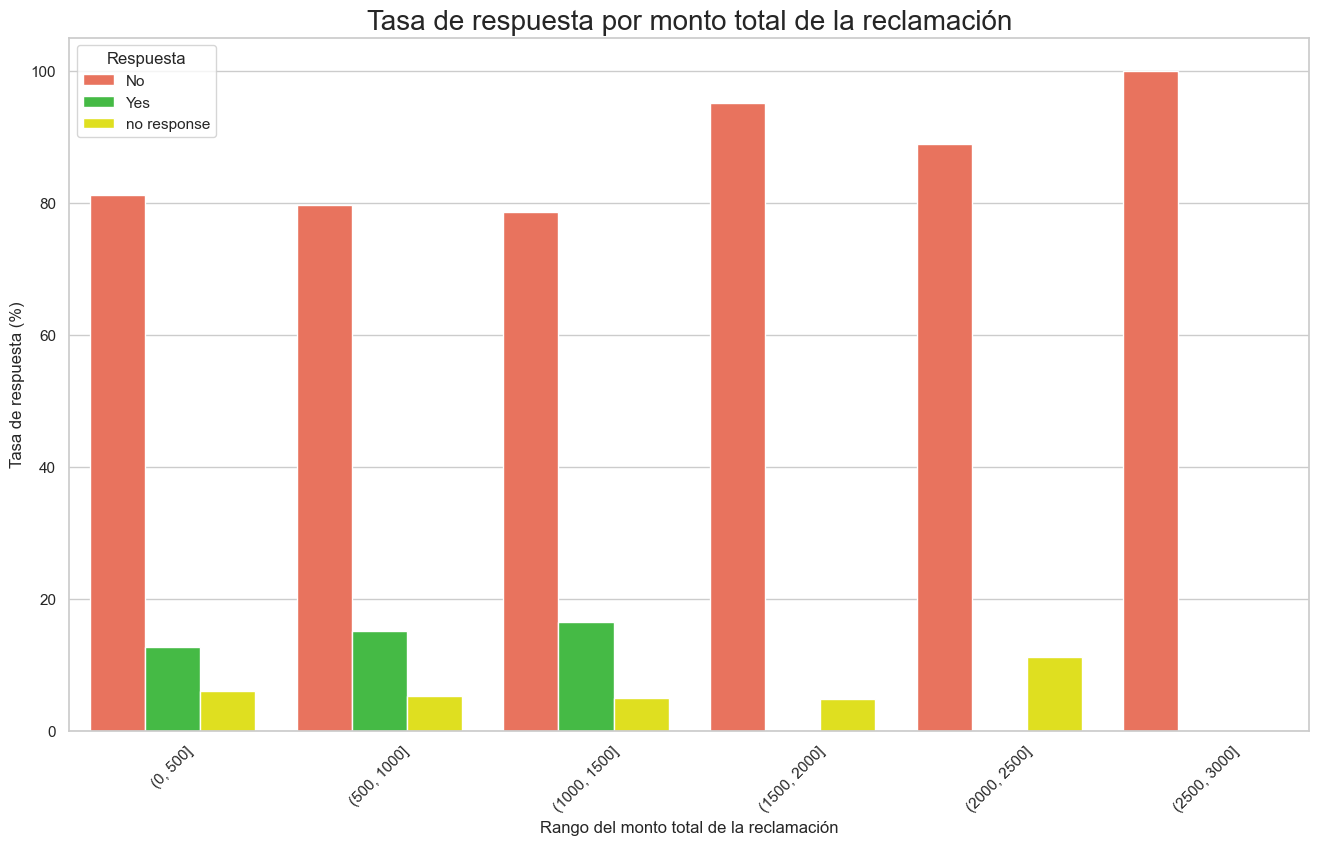

In [24]:
# Configuración de la paleta de colores si tienes respuestas específicas.
paleta_colores = {"Yes": "limegreen", "No": "tomato", "no response": "yellow"}

sns.barplot(x='claim_amount_range', y='rate', hue='response', data=response_rate_long, palette=paleta_colores)
plt.title('Tasa de respuesta por monto total de la reclamación', size=20)
plt.xlabel('Rango del monto total de la reclamación')
plt.ylabel('Tasa de respuesta (%)')
plt.legend(title='Respuesta')
plt.xticks(rotation=45)
plt.show()

- Show a plot of the response rate by income.

In [25]:
print(data['income'].unique())

[48029     0 22139 ... 61146 39837 64195]


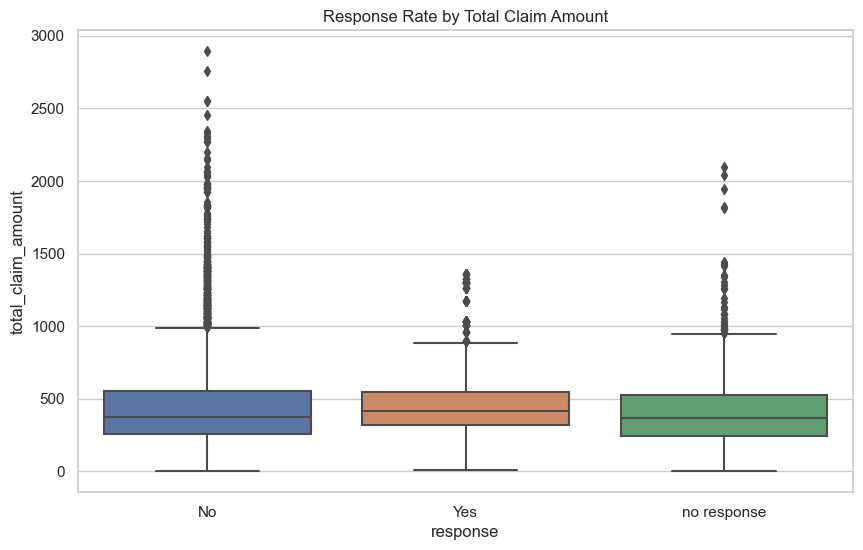

In [26]:
# Visualizar la tasa de respuesta por rango de ingreso.
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='response', y='total_claim_amount')
plt.title('Response Rate by Total Claim Amount')
plt.show()

- Check the data types of the columns. Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
(You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [59]:
#Para saber que columnas son numéricas podemos usar data.types
print(data.dtypes)

unnamed:_0                         int64
customer                          object
state                             object
customer_lifetime_value          float64
response                           int64
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size    

In [29]:
#Con get_numeric_data podemos saber que columnas son numericas
numericals = data.select_dtypes(include =np.number)
numericals

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [63]:
#Columnas categóricas
categoricals = data.select_dtypes(include=['object'])
categoricals

,customer,state,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


- Now we will try to check the distributions of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms

In [34]:
numericals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unnamed:_0                     10910 non-null  int64  
 1   customer_lifetime_value        10910 non-null  float64
 2   income                         10910 non-null  int64  
 3   monthly_premium_auto           10910 non-null  int64  
 4   months_since_last_claim        10277 non-null  float64
 5   months_since_policy_inception  10910 non-null  int64  
 6   number_of_open_complaints      10277 non-null  float64
 7   number_of_policies             10910 non-null  int64  
 8   total_claim_amount             10910 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 767.2 KB


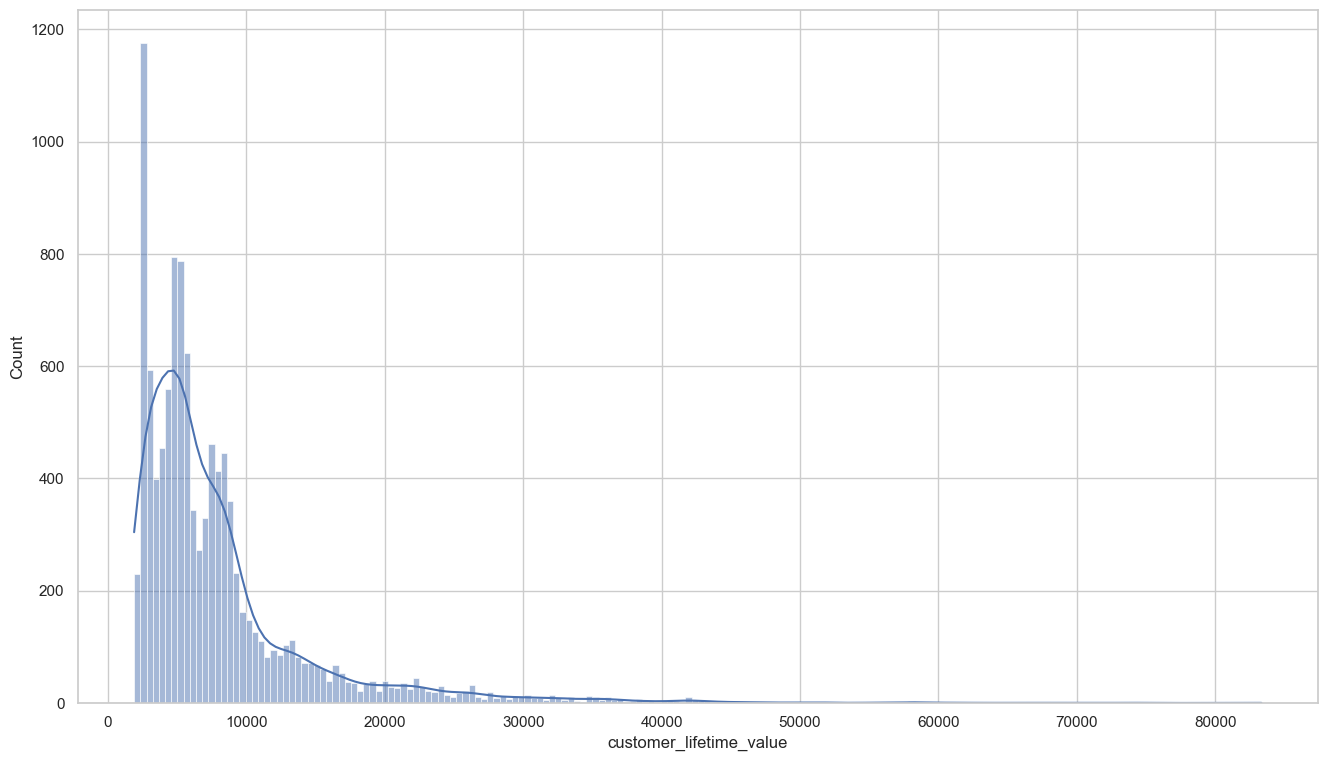

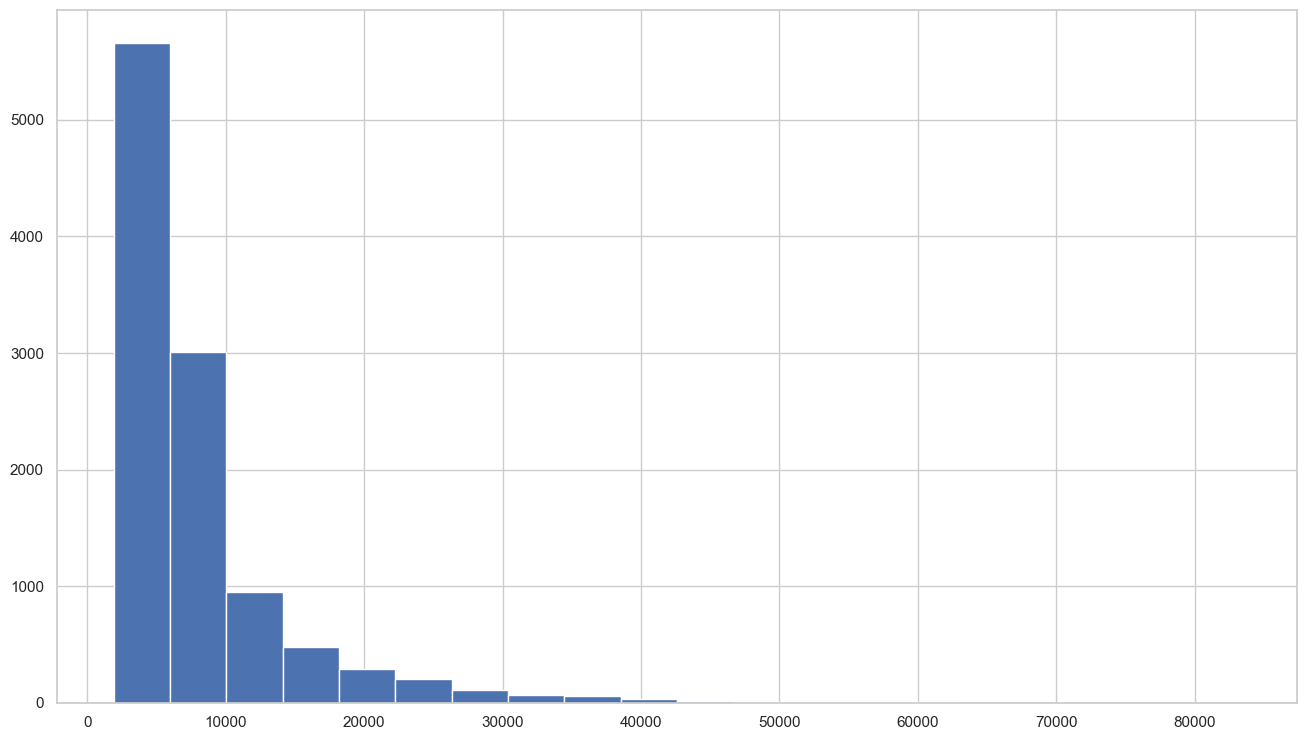

In [50]:
# Seaborn Distribution Plot column: customer_lifetime_value 
sns.histplot(data=data, x='customer_lifetime_value', kde=True)
plt.show()

# Matplotlib Histogram column: customer_lifetime_value 
plt.hist(data['customer_lifetime_value'], bins=20)
plt.show()

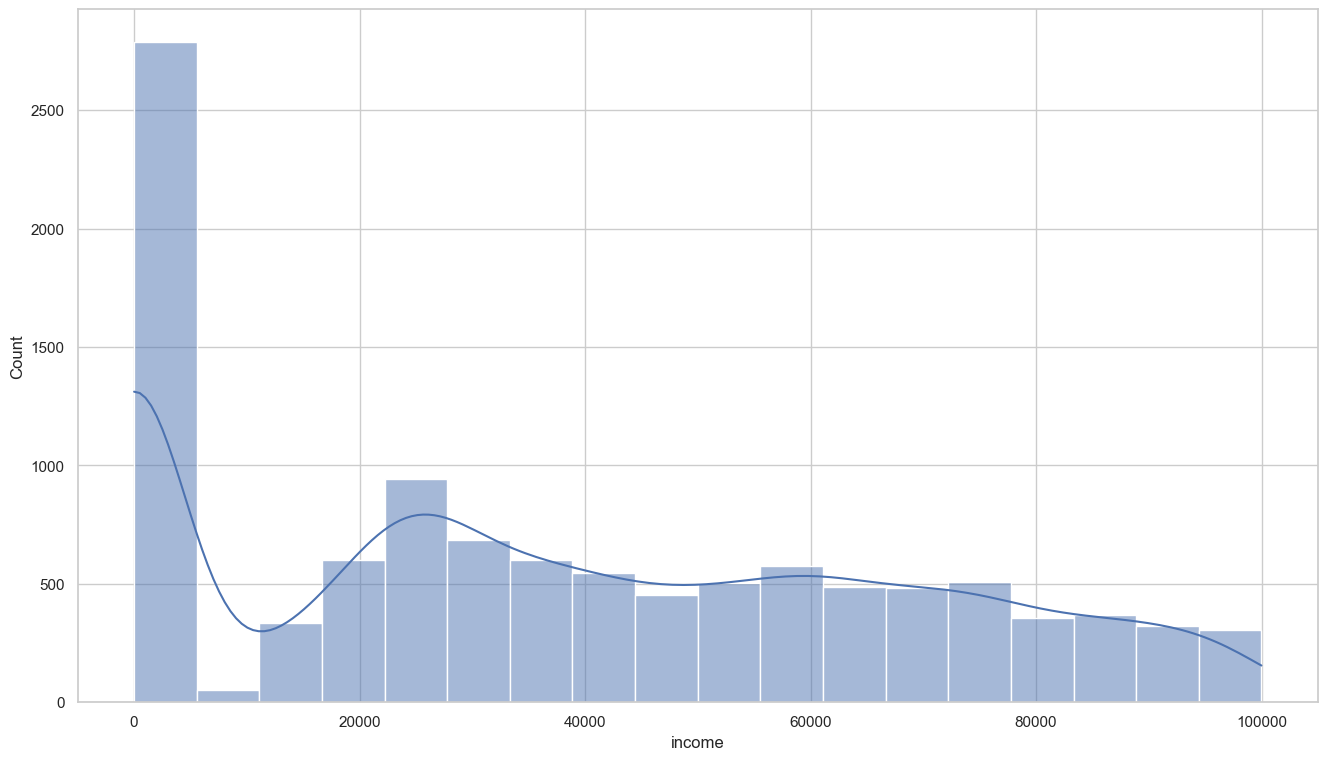

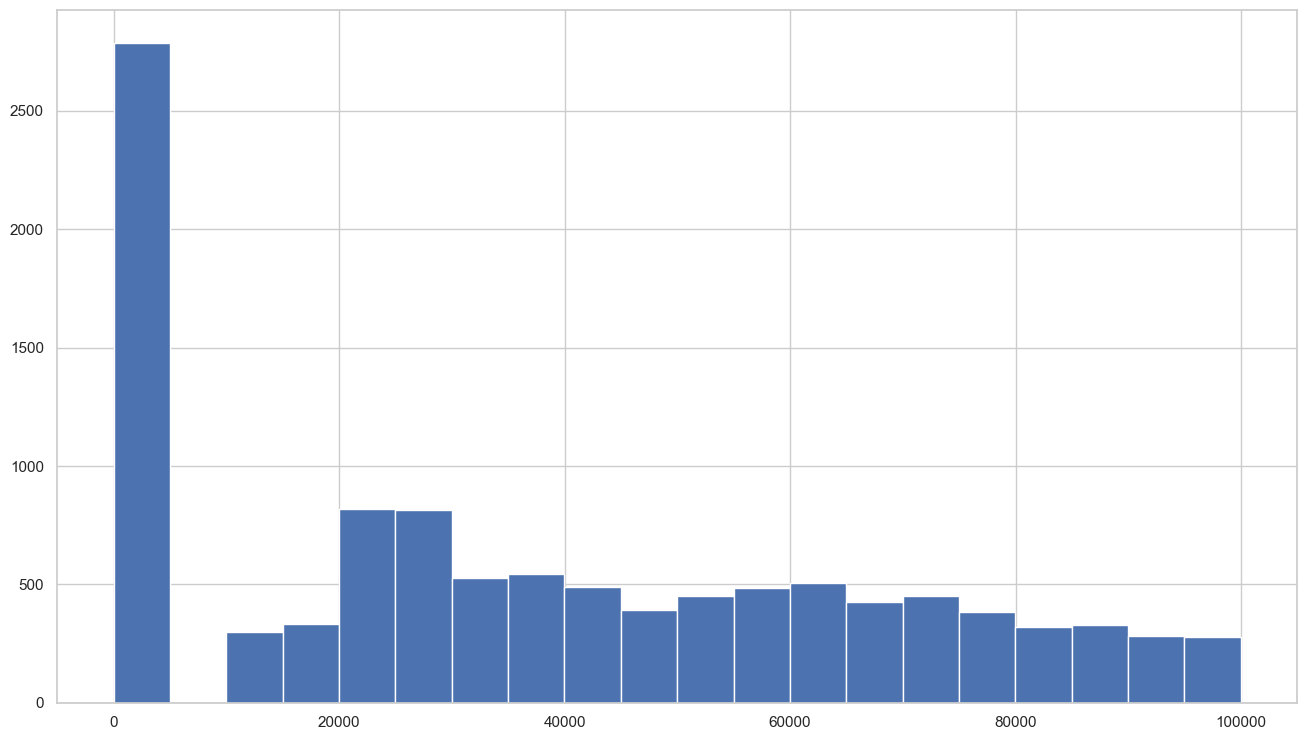

In [51]:
# Seaborn Distribution Plot column: customer_lifetime_value 
sns.histplot(data=data, x='income', kde= True)
plt.show()

# Matplotlib Histogram column: customer_lifetime_value 
plt.hist(data['income'], bins=20)
plt.show()

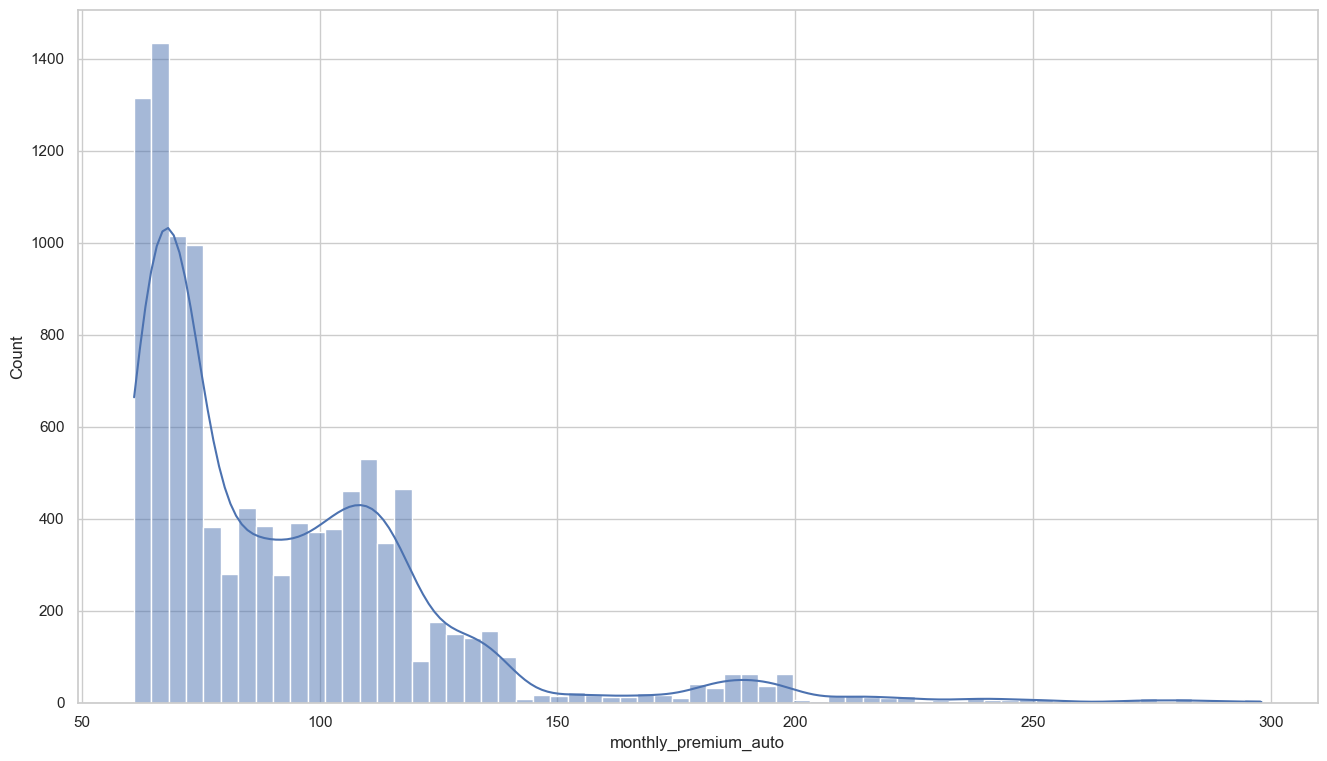

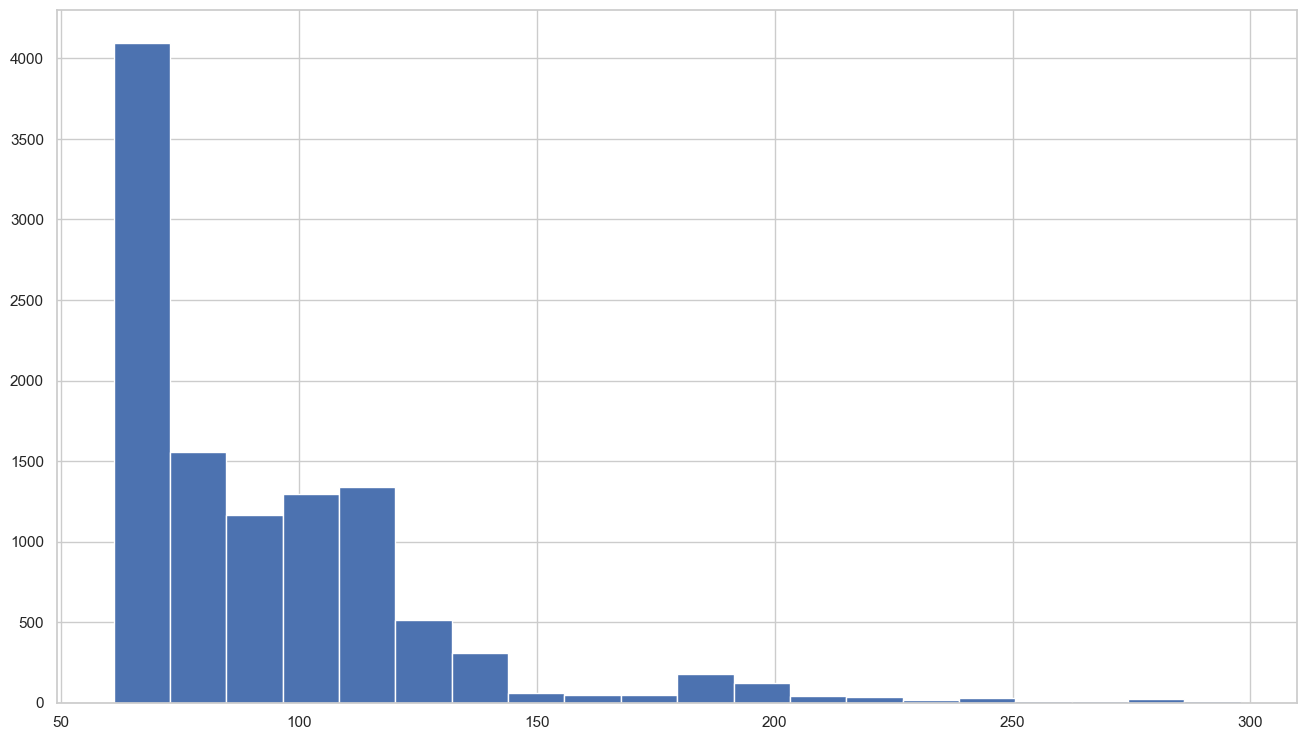

In [52]:
# Seaborn Distribution Plot column: customer_lifetime_value 
sns.histplot(data=data, x='monthly_premium_auto', kde=True)
plt.show()

# Matplotlib Histogram column: customer_lifetime_value 
plt.hist(data['monthly_premium_auto'], bins=20)
plt.show()

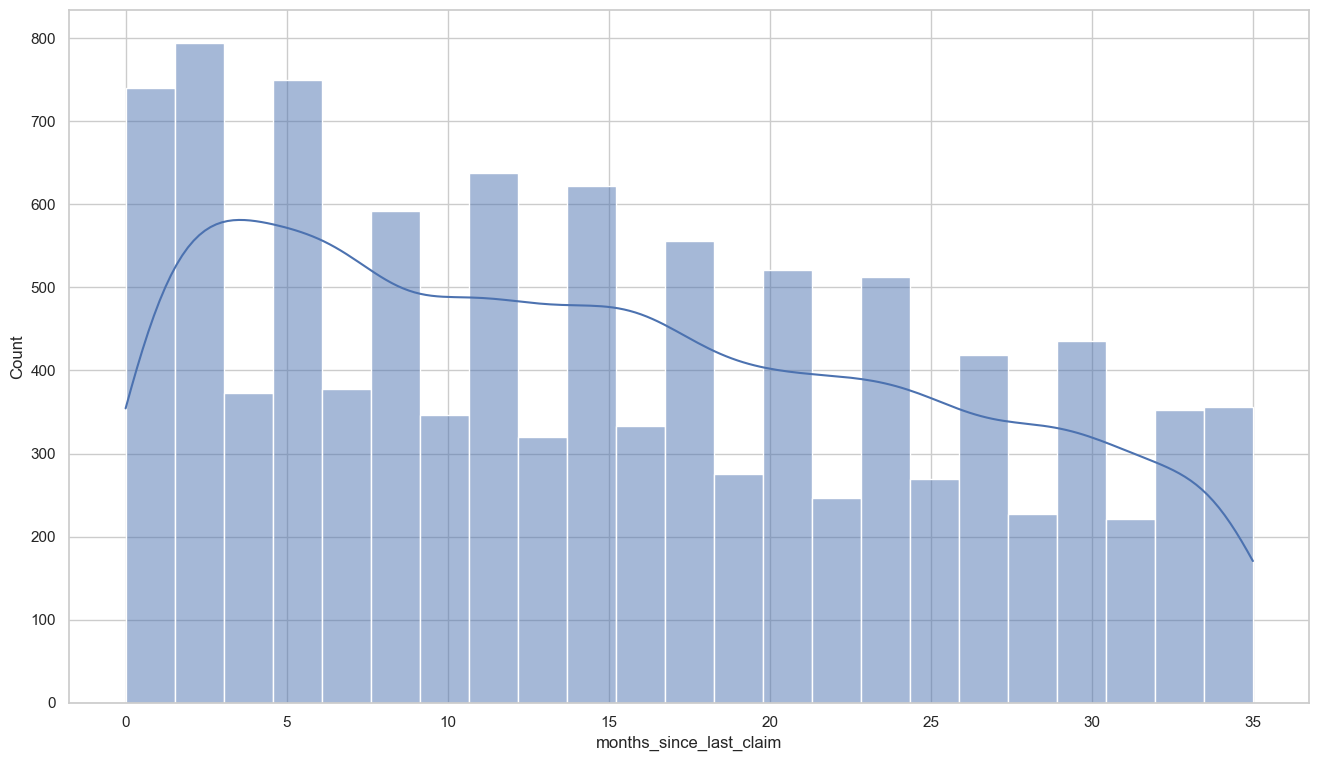

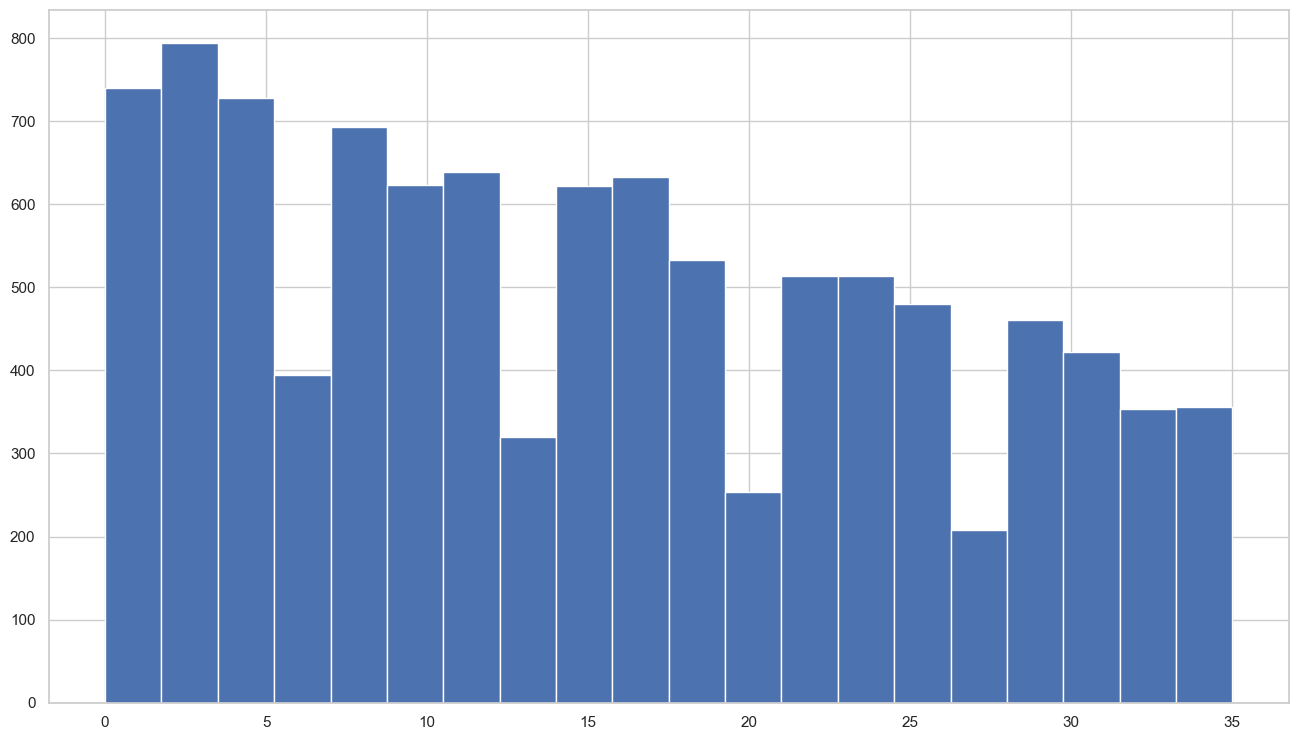

In [53]:
# Seaborn Distribution Plot column: customer_lifetime_value 
sns.histplot(data=data, x='months_since_last_claim', kde=True)
plt.show()

# Matplotlib Histogram column: customer_lifetime_value 
plt.hist(data['months_since_last_claim'], bins=20)
plt.show()

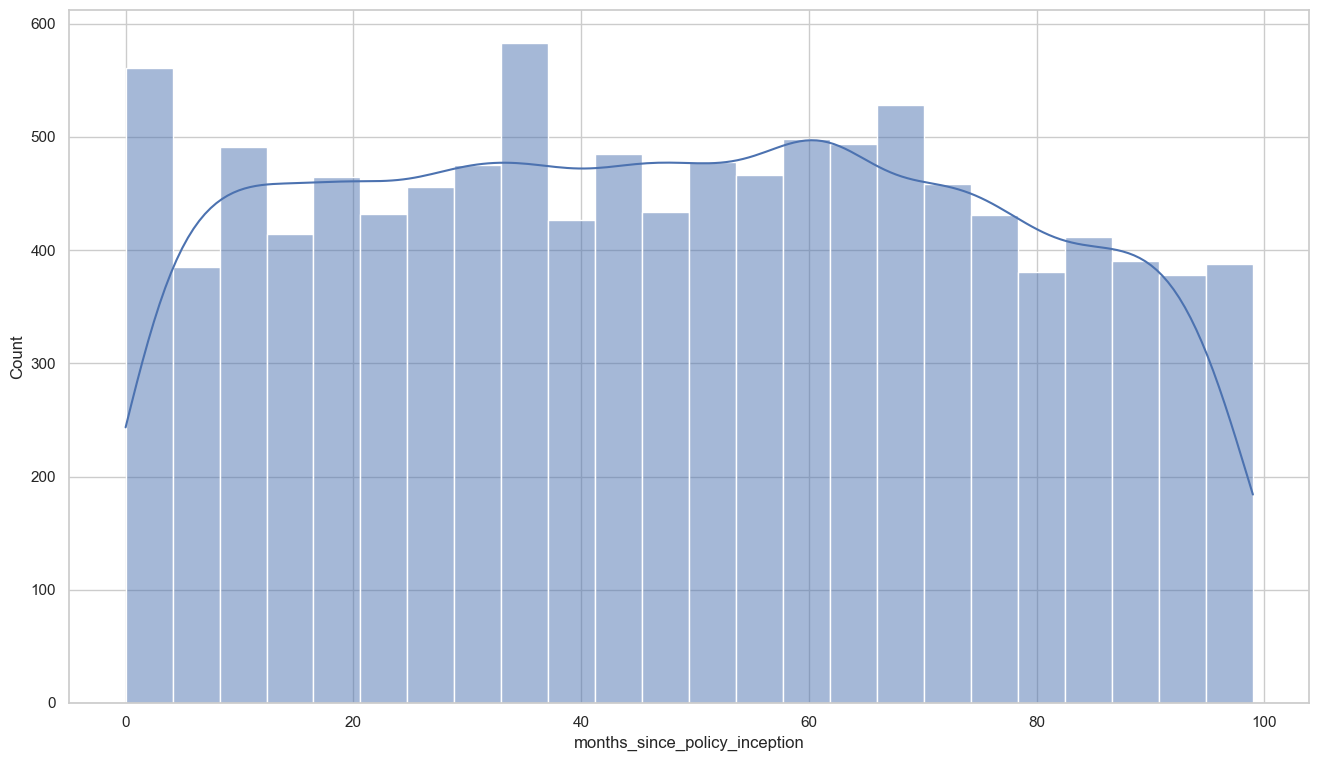

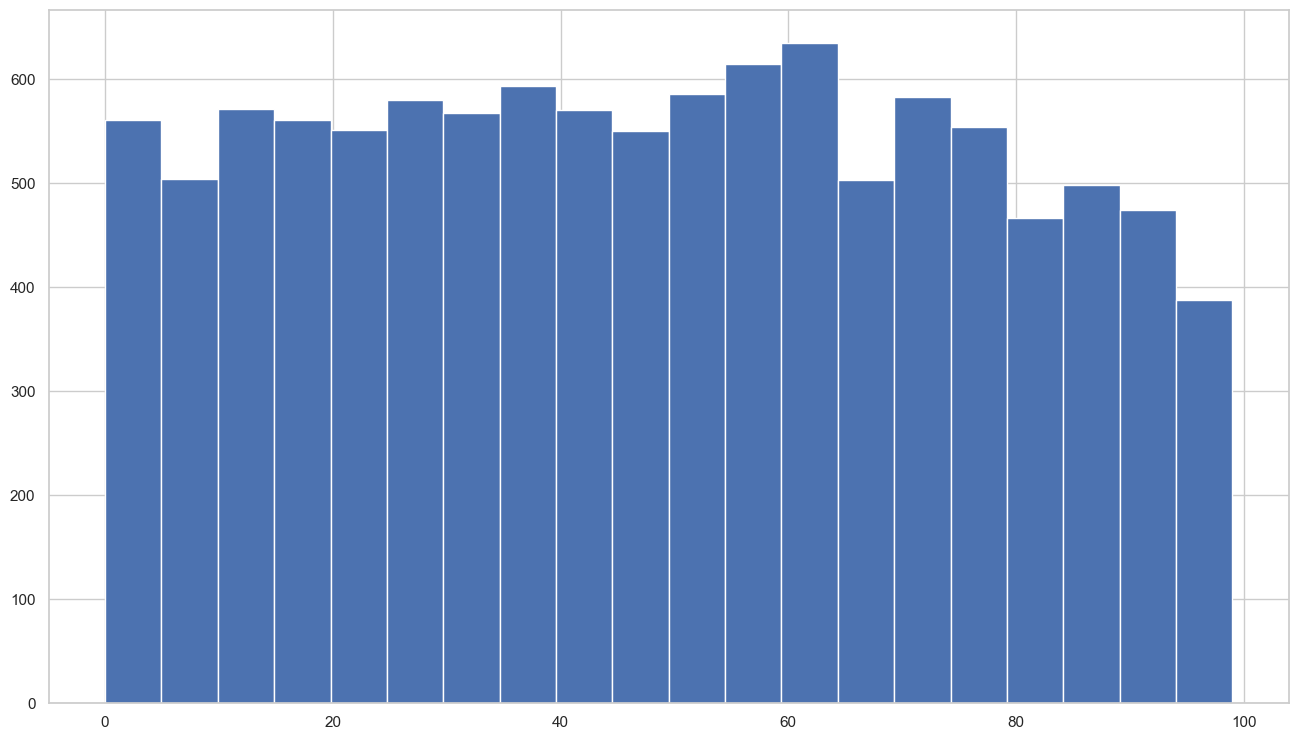

In [54]:
# Seaborn Distribution Plot column: customer_lifetime_value 
sns.histplot(data=data, x='months_since_policy_inception', kde=True)
plt.show()

# Matplotlib Histogram column: customer_lifetime_value 
plt.hist(data['months_since_policy_inception'], bins=20)
plt.show()

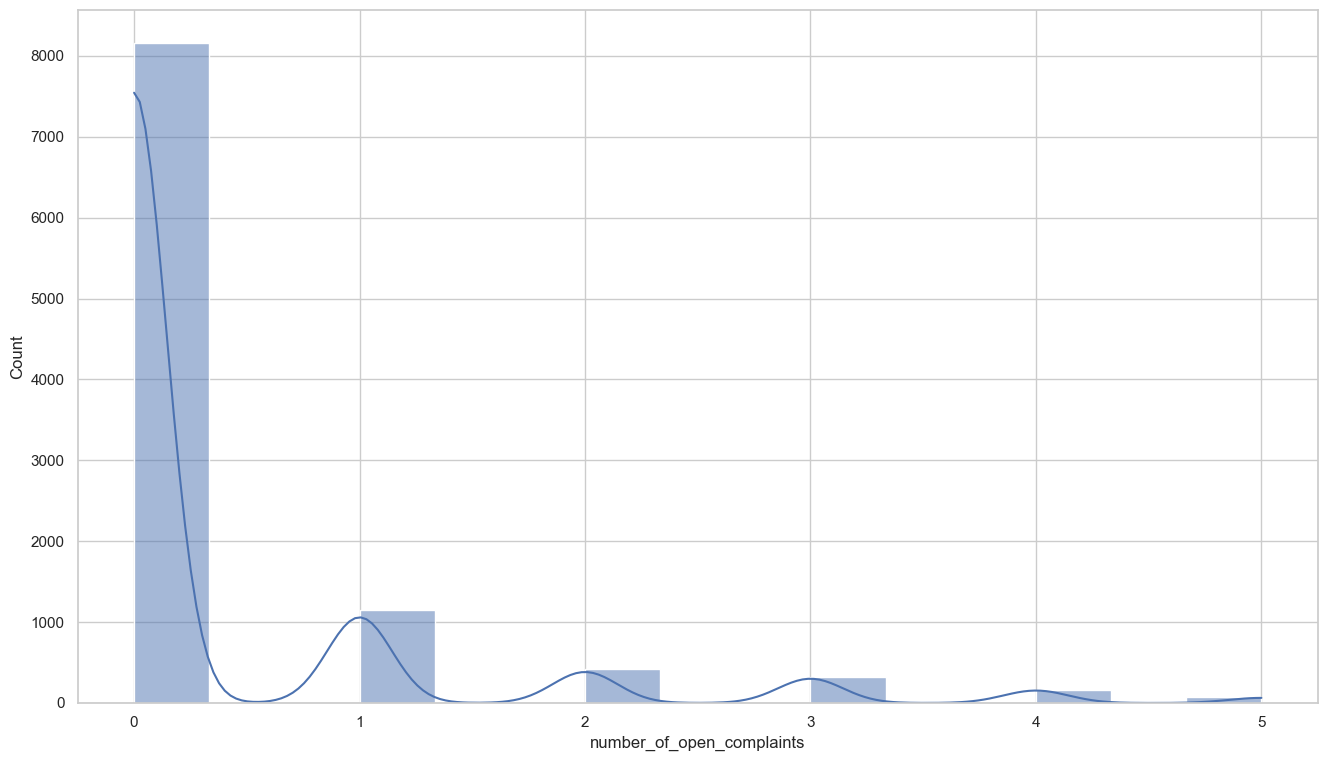

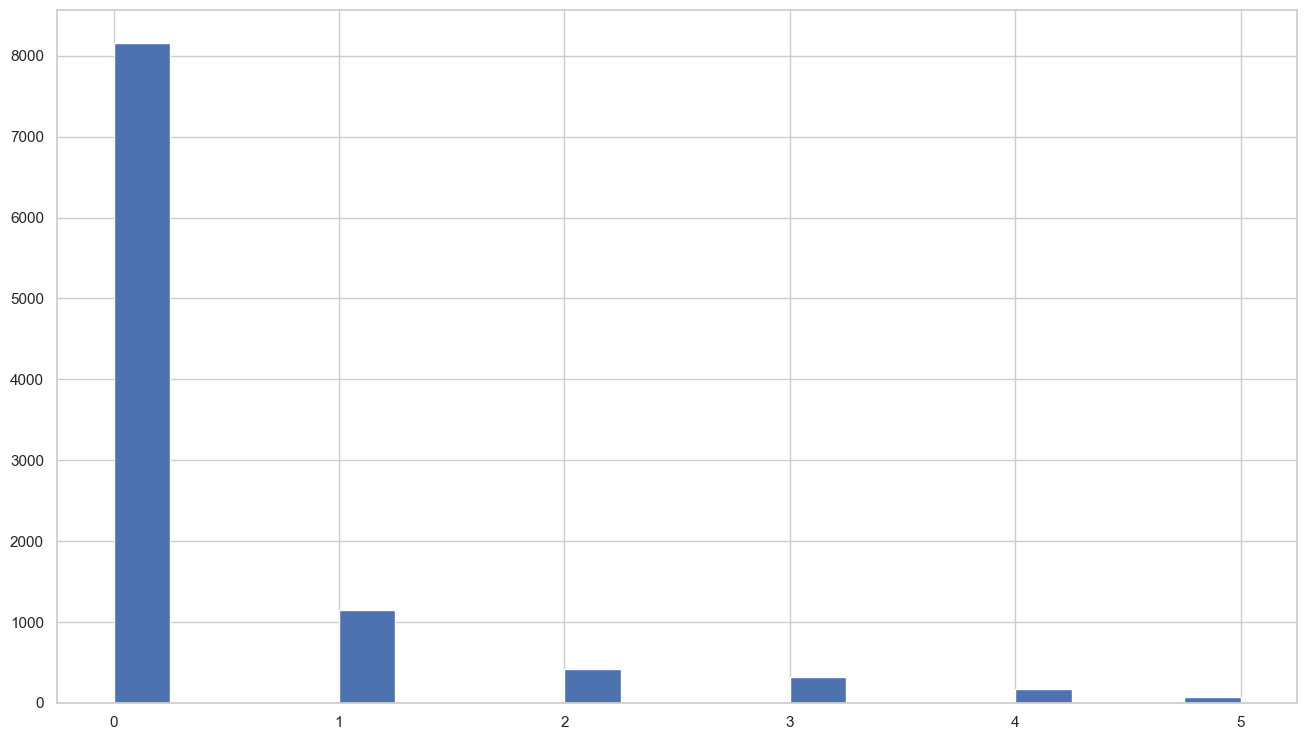

In [57]:
# Seaborn Distribution Plot column: customer_lifetime_value 
sns.histplot(data=data, x='number_of_open_complaints', kde=True)
plt.show()

# Matplotlib Histogram column: customer_lifetime_value 
plt.hist(data['number_of_open_complaints'], bins=20)
plt.show()

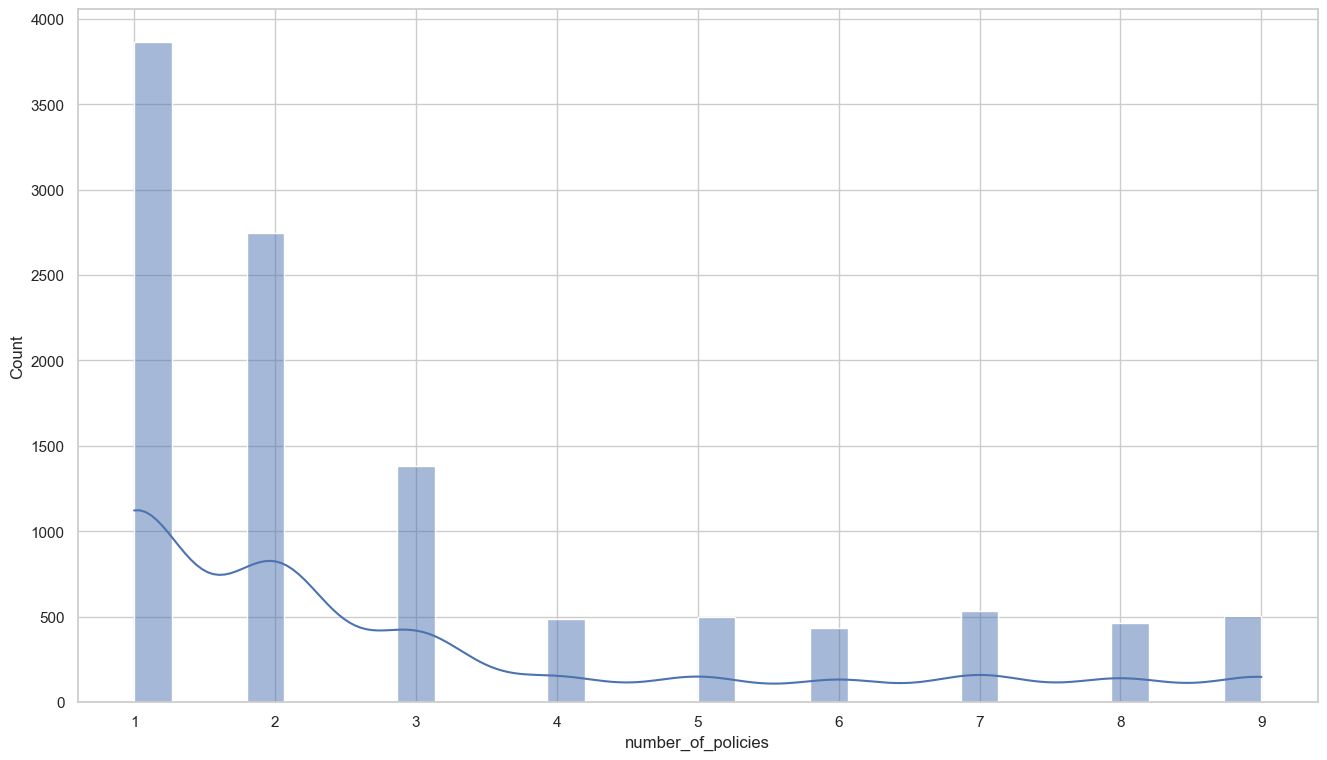

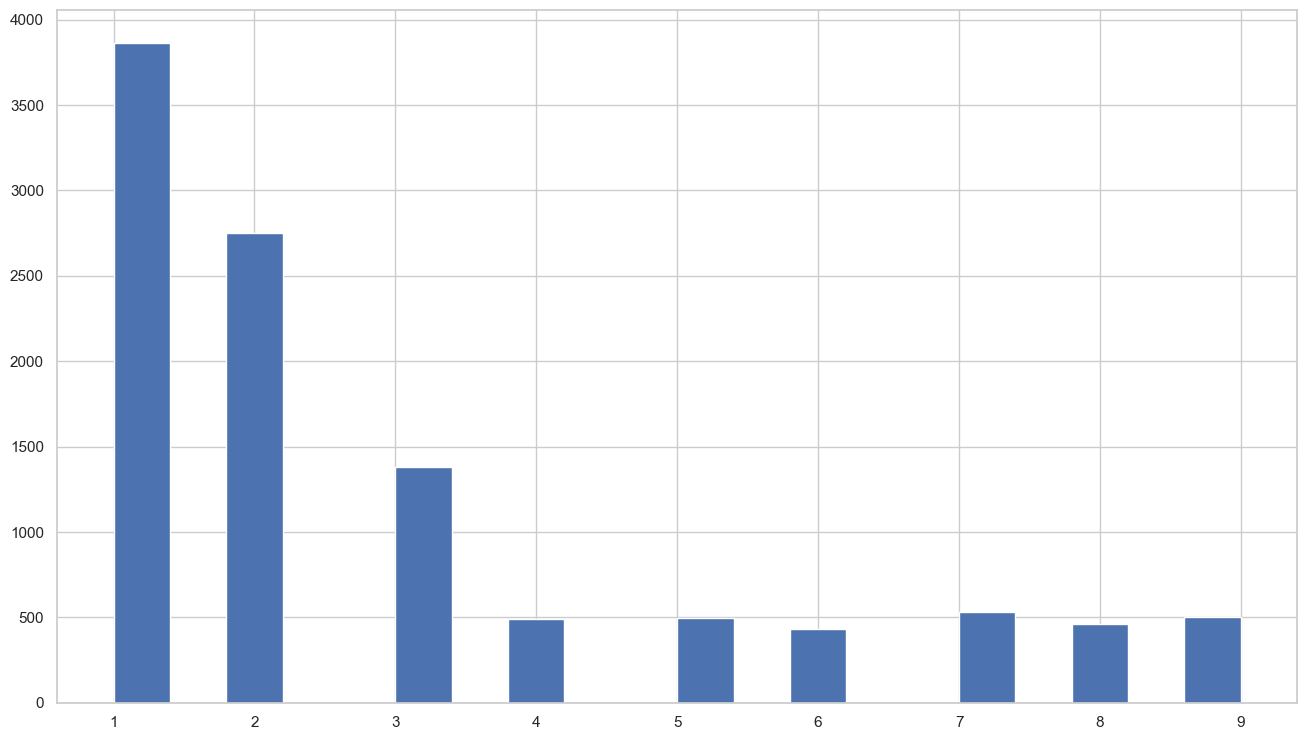

In [58]:
# Seaborn Distribution Plot column: customer_lifetime_value 
sns.histplot(data=data, x='number_of_policies', kde=True)
plt.show()

# Matplotlib Histogram column: customer_lifetime_value 
plt.hist(data['number_of_policies'], bins=20)
plt.show()

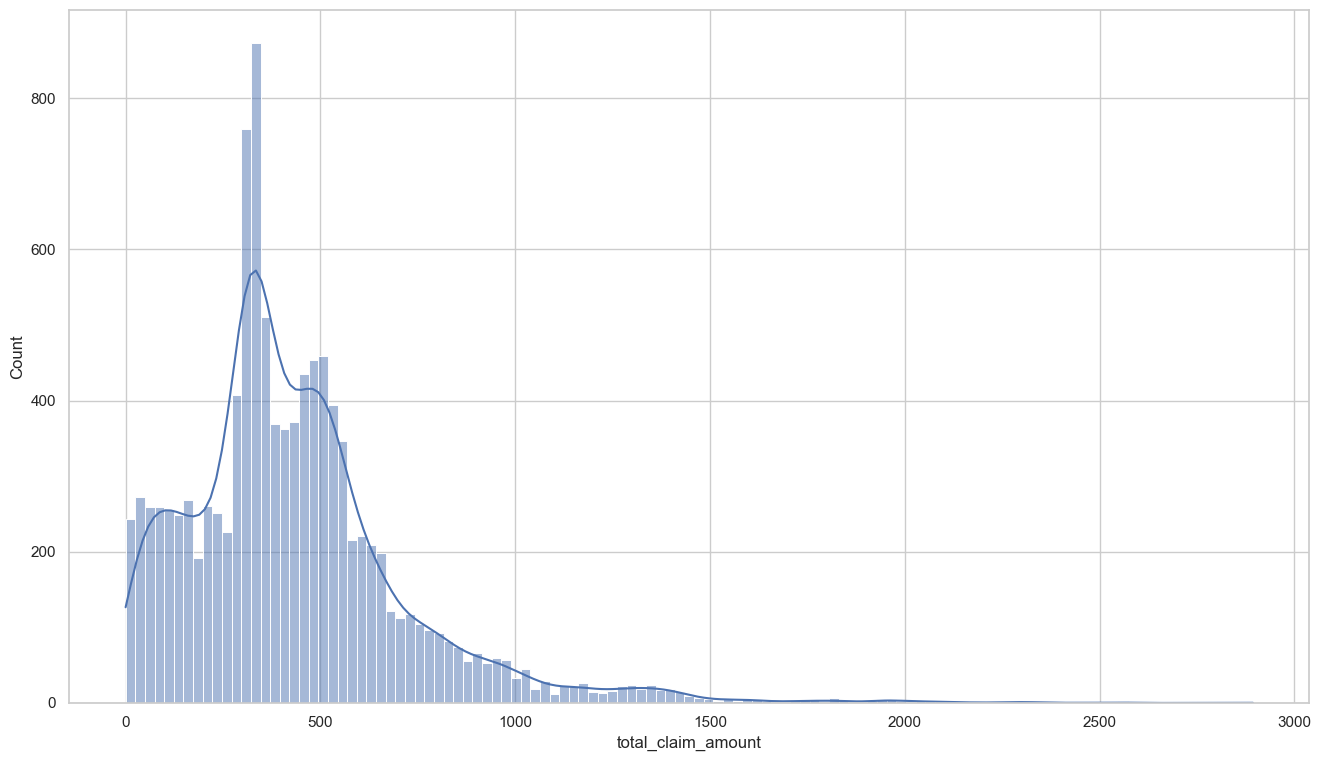

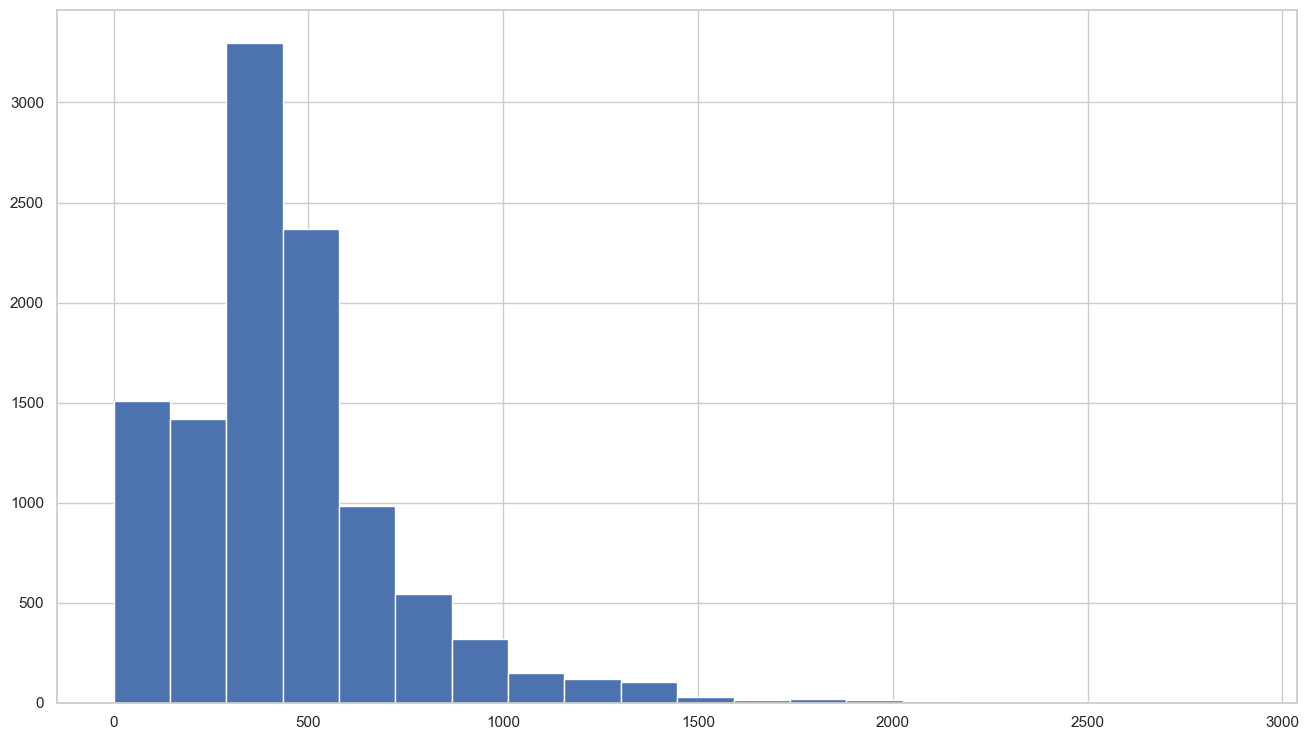

In [59]:
# Seaborn Distribution Plot column: customer_lifetime_value 
sns.histplot(data=data, x='total_claim_amount', kde=True)
plt.show()

# Matplotlib Histogram column: customer_lifetime_value 
plt.hist(data['total_claim_amount'], bins=20)
plt.show()

- For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable.

In [64]:
numericals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unnamed:_0                     10910 non-null  int64  
 1   customer_lifetime_value        10910 non-null  float64
 2   income                         10910 non-null  int64  
 3   monthly_premium_auto           10910 non-null  int64  
 4   months_since_last_claim        10277 non-null  float64
 5   months_since_policy_inception  10910 non-null  int64  
 6   number_of_open_complaints      10277 non-null  float64
 7   number_of_policies             10910 non-null  int64  
 8   total_claim_amount             10910 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 767.2 KB


In [66]:
#Multicollinearity between customer_lifetime_value and total_claim_amount
numericals[["customer_lifetime_value", "total_claim_amount"]].corr()

,customer_lifetime_value,total_claim_amount
customer_lifetime_value,1.000000,0.232626
total_claim_amount,0.232626,1.000000


In [72]:
#Multicollinearity between income and total_claim_amount
numericals[["income", "total_claim_amount"]].corr()

,income,total_claim_amount
income,1.000000,-0.354141
total_claim_amount,-0.354141,1.000000


In [73]:
#Multicollinearity between monthly_premium_auto and total_claim_amount
numericals[["monthly_premium_auto", "total_claim_amount"]].corr()

,monthly_premium_auto,total_claim_amount
monthly_premium_auto,1.000000,0.631799
total_claim_amount,0.631799,1.000000


In [74]:
#Multicollinearity between months_since_last_claim and total_claim_amount
numericals[["months_since_last_claim", "total_claim_amount"]].corr()

,months_since_last_claim,total_claim_amount
months_since_last_claim,1.000000,0.013137
total_claim_amount,0.013137,1.000000


In [75]:
#Multicollinearity between months_since_policy_inception and total_claim_amount
numericals[["months_since_policy_inception", "total_claim_amount"]].corr()

,months_since_policy_inception,total_claim_amount
months_since_policy_inception,1.000000,0.003095
total_claim_amount,0.003095,1.000000


In [76]:
#Multicollinearity between number_of_open_complaints and total_claim_amount
numericals[["number_of_open_complaints", "total_claim_amount"]].corr()

,number_of_open_complaints,total_claim_amount
number_of_open_complaints,1.000000,-0.011379
total_claim_amount,-0.011379,1.000000


In [77]:
#Multicollinearity between number_of_policies and total_claim_amount
numericals[["number_of_policies", "total_claim_amount"]].corr()

,number_of_policies,total_claim_amount
number_of_policies,1.000000,-0.008923
total_claim_amount,-0.008923,1.000000


- Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features.

In [94]:
numericals.drop('unnamed:_0', axis=1, inplace=True)

In [95]:
numericals

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [96]:
correlation_matrix = numericals.corr()

In [97]:
correlation_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.028306,0.403069,0.016052,0.016960,-0.032243,0.016024,0.232626
income,0.028306,1.000000,-0.009788,-0.023814,-0.005903,0.007163,-0.009960,-0.354141
monthly_premium_auto,0.403069,-0.009788,1.000000,0.008744,0.018953,-0.010350,-0.020505,0.631799
months_since_last_claim,0.016052,-0.023814,0.008744,1.000000,-0.039318,0.002246,0.007678,0.013137
months_since_policy_inception,0.016960,-0.005903,0.018953,-0.039318,1.000000,0.004376,-0.009123,0.003095
number_of_open_complaints,-0.032243,0.007163,-0.010350,0.002246,0.004376,1.000000,0.004098,-0.011379
number_of_policies,0.016024,-0.009960,-0.020505,0.007678,-0.009123,0.004098,1.000000,-0.008923
total_claim_amount,0.232626,-0.354141,0.631799,0.013137,0.003095,-0.011379,-0.008923,1.000000


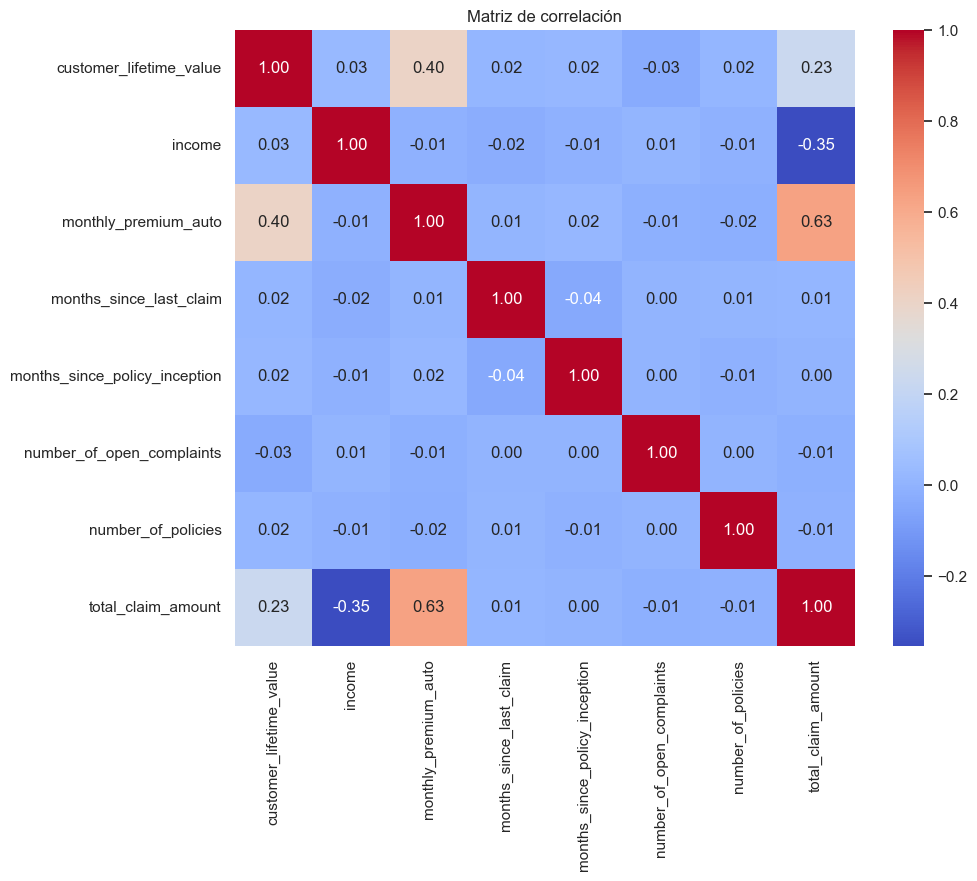

In [98]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()